<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

----

This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [**here**](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

In [3]:
# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [7]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [11]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the Date column to a datetime type**

Use **pd.to_datetime** to convert the Date column to a datetime.

**WARNING**: The date column is formatted as day-month-year. Does **pd.to_datetime** work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check the [**documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for **pd.to_datetime**, and see if one of the settings fixes things.

In [23]:
pox['date'] = pd.to_datetime(pox['date'], format = '%d/%m/%Y')
pox.head()

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


**Set the **Date** column to be the index**

In [25]:
pox.set_index('date', inplace = True)
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [39]:
pox.index.min(), pox.index.max()

(Timestamp('2005-01-03 00:00:00'), Timestamp('2014-12-29 00:00:00'))

**Plot a histogram of the Budapest cases column**

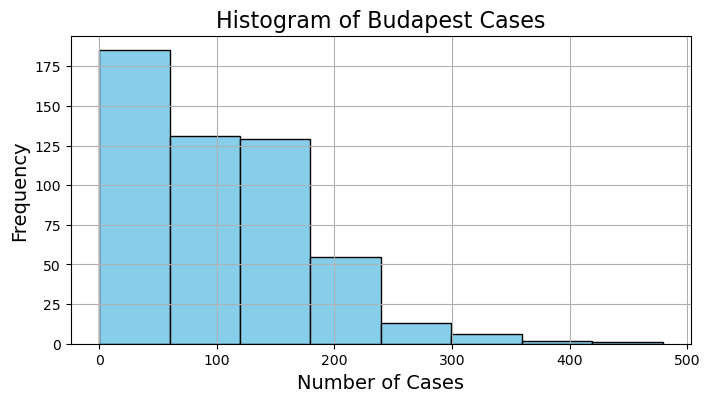

In [67]:
# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(pox['budapest_cases'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Budapest Cases', fontsize=16)
plt.xlabel('Number of Cases', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method on the DataFrame to answer this question.

In [63]:
pox.resample('YE').mean().head()

,budapest_cases
date,
2005-12-31,87.730769
2006-12-31,124.961538
2007-12-31,119.075472
2008-12-31,85.403846
2009-12-31,106.288462


### Visualizations

**Make a line plot of chickenpox cases**

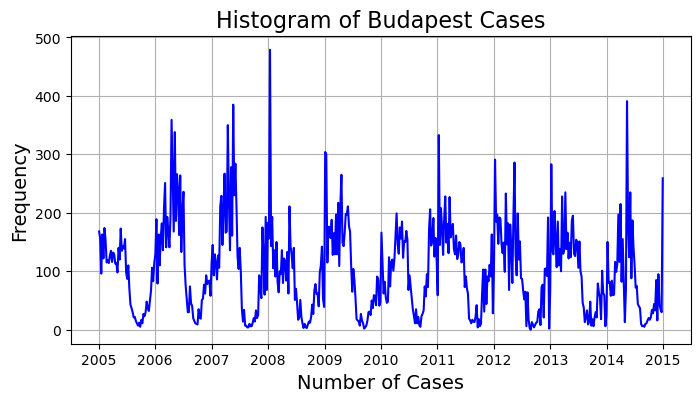

In [75]:
plt.figure(figsize=(8, 4))
plt.plot(pox['budapest_cases'], color='blue', linestyle = '-')
plt.title('Histogram of Budapest Cases', fontsize=16)
plt.xlabel('Number of Cases', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

**In short answer format, describe any apparent trends**

The chickenpox diseases is happen during the begining March to May (winter to spring). The line chart shows a seasonal trend.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

In [116]:
weekly = pox.resample('W').mean()
weekly

,budapest_cases
date,
2005-01-09,168.0
2005-01-16,157.0
2005-01-23,96.0
2005-01-30,163.0
2005-02-06,122.0
...,...
2014-12-07,95.0
2014-12-14,43.0
2014-12-21,35.0


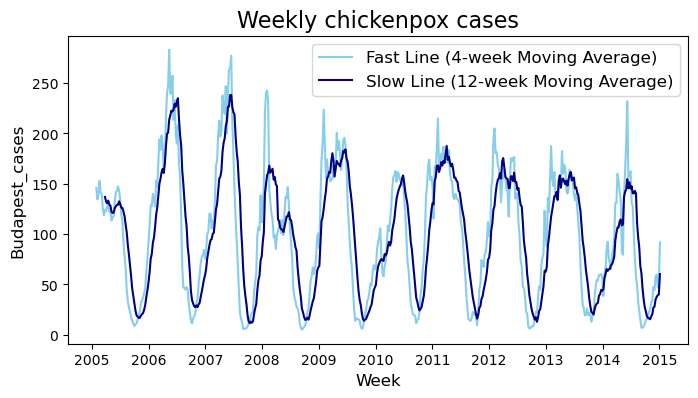

In [118]:
# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(weekly['budapest_cases'].rolling(4).mean(), color='skyblue', label='Fast Line (4-week Moving Average)')
plt.plot(weekly['budapest_cases'].rolling(12).mean(), color='navy', label='Slow Line (12-week Moving Average)')

# Add title, labels, and legend
plt.title('Weekly chickenpox cases', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Budapest_cases', fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()

### Plot yearly chickenpox cases

You may need to use [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again for this.

In [96]:
yearly = pox.resample('YE').mean()
yearly

,budapest_cases
date,
2005-12-31,87.730769
2006-12-31,124.961538
2007-12-31,119.075472
2008-12-31,85.403846
2009-12-31,106.288462
2010-12-31,100.423077
2011-12-31,103.923077
2012-12-31,101.000000
2013-12-31,99.173077


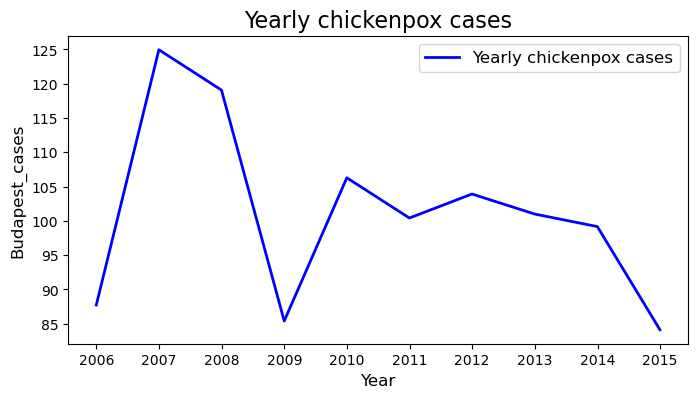

In [102]:
# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(yearly['budapest_cases'], color='blue', label='Yearly chickenpox cases', linewidth=2)
plt.title('Yearly chickenpox cases', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Budapest_cases', fontsize=12)
plt.legend(fontsize=12)
plt.show()